# Trabalho final ML

<a href="https://www.kaggle.com/code/reihanenamdari/depression-logistic-regression-and-gridsearchcv/data">Dataset</a>
<br>
<hr>

<br>

#### Contexto e objetivo do trabalho
O trabalho prático da disciplina CMP263 - Aprendizagem de Máquina visa
permitir que os alunos desenvolvam um modelo preditivo para um problema de
interesse, praticando aspectos discutidos na disciplina relacionados ao treinamento e
avaliação de modelos de classificação ou regressão, e interpretação dos modelos
gerados.
A proposta do projeto final é que os alunos aprofundem e consolidem sua
experiência no desenvolvimento de modelos preditivos, abordando aspectos ao
longo de toda a metodologia de treinamento de modelos, conforme discutimos em
aula. 

## Metodologia


1. Entendimento do negócio
2. Entendimento dos dados
3. Preparação dos dados
4. Modelagem
5. Validação


## 1. Entendimento do negócio

### About Dataset
##### Context


O dataset original foi publicado pro Frankcc no seguinte link: <a href="https://www.kaggle.com/datasets/francispython/b-depression">Link Kaggle</a>

O dataset está envolvido na análise da depressão. Os dados consistem de um estudo das condições de vida de pessoas que vivem em zonas rurais. 

- Conteúdo
1. name,detail
2. surveyid,Individual Identifier
3. village,Village Identifier
4. survey_date,Date of Interview (days since Jan1 of first year)
5. femaleres,Female respondent
6. age,Age (respondent)
7. married,Marital status (respondent)
8. children,Number of children
9. hhsize,Household size
10. edu,Years of education completed (respondent)
11. hh_children,Number of children <=18 or younger in Household
12. hh_totalmembers,Household size
13. cons_nondurable,Non-durable expenditure (USD)
14. asset_livestock,Value of livestock (USD)
15. asset_durable,Value of durable goods (USD)
16. asset_phone,Value of cell phone (USD)
17. asset_savings,Value of savings (USD)
18. asset_land_owned_total,Land owned (acres)
19. asset_niceroof,Has non-thatched roof (dummy)
20. cons_allfood,Food total (USD)
21. cons_ownfood,Food own production (USD)
22. cons_alcohol,Alcohol (USD)
23. cons_tobacco,Tobacco (USD)
24. cons_med_total,Medical expenditure past month (USD)
25. cons_med_children,"Medical expenditure, children (USD)"
26. cons_ed,Education expenditure (USD)
27. cons_social,Social expenditure (USD)
28. cons_other,Other expenditure (USD)
29. ent_wagelabor,Wage labor primary income (dummy)
30. ent_ownfarm,Own farm primary income (dummy)
31. ent_business,Non-ag business primary income (dummy)
32. ent_nonagbusiness,Non-agricultural business owner (dummy)
33. ent_employees,Number of employees working in non-ag business
34. ent_nonag_revenue,"Non-ag business revenue, monthly (USD)"
35. ent_nonag_flowcost,"Non-ag business flow expenses, monthly (USD)"
36. ent_farmrevenue,"Farm revenue, monthly (USD)"
37. ent_farmexpenses,"Farm flow expenses, monthly (USD)"
38. ent_animalstockrev,"Livestock sales and meat revenue, monthly (USD)"
39. ent_total_cost,"Total expenses, monthly (USD)"
40. fs_adskipm_often,"Meals skipped (adults, \# last month)"
41. fs_adwholed_often,"Whole days without food (adults, \# last month)"
42. fs_chskipm_often,"Meals skipped (children, \# last month)"
43. fs_chwholed_often,"Whole days without food (children, \# last month)"
44. fs_meat,Number of times ate meat or fish (last week)
45. fs_enoughtom,Enough food in the house for tomorrow? (dummy)
46. fs_sleephun,"Respondent slept hungry (last week, dummy)"
47. med_expenses_hh_ep,"Medical expenses per episode, entire HH (USD)"
48. med_expenses_sp_ep,"Medical expenses per episode, spouses (USD)"
49. med_expenses_child_ep,"Medical expenses per episode, children (USD)"
50. med_portion_sickinjured,Proportion of household sick/injured (1 month)
51. med_port_sick_child,Proportion of children sick/injured (1 month)
52. med_afford_port,Proportion of sick/injured who could afford treatment
53. med_sickdays_hhave,Average number of sick days per HH member
54. med_healthconsult,Propotion of illnesses where doctor was consulted
55. med_vacc_newborns,Number of newborns vaccinated
56. med_child_check,Proportion of children <14 getting checkup (6 months)
57. med_u5_deaths,Proportion of children <5 who died (1 year)
58. ed_expenses,Education expenditure past month (USD)
59. ed_expenses_perkid,Education expenditure per child past month (USD)
60. ed_schoolattend,Proportion of school-aged children in school
61. ed_sch_missedpc,School days missed past month (per child)
62. ed_work_act_pc,Income-generating activities per school-age child >6
63. labor_primary,Casual or Wage Labor Primary Source of Income
64. wage_expenditures,Expenditure on wages for HH enterprise
65. durable_investment,Durable Investments
66. nondurable_investment,Non-durable Investments
67. given_mpesa,Sent money using M-Pesa
68. amount_given_mpesa,Amount sent using M-Pesa
69. received_mpesa,Received money using M-Pesa
70. amount_received_mpesa,Amount received using M-Pesa
71. net_mpesa,Net Remittances using M-Pesa
72. saved_mpesa,Saved money using M-Pesa
73. amount_saved_mpesa,Amount saved using M-Pesa
74. early_survey,Psychology survey in 1st wave (dummy)
75. depressed,Meets epidemiological threshold for moderate depression (dummy)
76. day_of_week,Day of week of survey (0=Sunday)
77. depressed: [ Zero: No depressed] or [One: depressed] (Binary for target class)


Acknowledgements
A publicação original no Kaggle foi feita por Frankcc i

Referências

<a href="https://zindi.africa/competitions/busara-mental-health-prediction-challenge/data">Busara</a>

## Problema

Classificação -  objetivo é treinar o melhor classificador possível para detectar o risco de depressão, pois os dados da depressão são categóricos (0,1). Induz um classificador, gerando saídas em um domínio discreto, não ordenado 

yk = f (xk) ∈ {c1, c2, …, cm},
onde m é o número de classes.
Para m = 2: classificação binária
Para m > 2: classificação multiclasse

- Classificação binária

Pergunta:

- 1. Dada as características socioeconômicas do indivíduo no survey, é possível classificar de forma assertiva se este indivíduo é depressivo ou não?
 

## Configs de ambiente

<hr>
SO - Ubuntu 20.4
<br>
Python version - 3.7.6
<br>
Conda version version - 4.8.2


<hr>


In [368]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing import sequence
import seaborn as sns
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D
from tqdm.notebook import trange, tqdm
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', None)
import random as r


%matplotlib inline

## i) análise exploratória dos dados
para identificar possíveis problemas nos
dados que possam impactar negativamente no treinamento de modelos;

In [369]:
for dirname, _, filenames in os.walk('./Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./Dataset/depressed.csv
./Dataset/test.csv
./Dataset/NANValues.ipynb
./Dataset/Variable_explanations.csv
./Dataset/train.csv
./Dataset/outputResults/outputBestResultPrecision(unbalanced).ipynb
./Dataset/outputResults/datasetSemImputação.ipynb
./Dataset/outputResults/datasetSemOutliersSemBalanced.ipynb
./Dataset/outputResults/datasetSemNormalizacao.ipynb
./Dataset/outputResults/datasetSemOutliers.ipynb
./Dataset/outputResults/datasetComUndersampling.ipynb
./Dataset/outputResults/datasetSemOutliersComBalanced.ipynb
./Dataset/outputResults/BalancedClasses/MetricsResult300x200Balanced.ipynb
./Dataset/outputResults/Columns/outputSemChildrenColumn.ipynb


In [370]:
target_column_name = 'depressed'

In [371]:
df_depressed_dataset = pd.read_csv("Dataset/depressed.csv")

In [372]:
df_depressed_dataset.head()

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,23-Nov-61,1,28,1,4,6,10,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,0.000000,0.000000,1,0.000000,0,0.0,5
1,747,57,24-Oct-61,1,23,1,3,5,8,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,1,4.804611,4.804611,0,0.000000,0,1.0,3
2,1190,115,05-Oct-61,1,22,1,3,5,9,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,8.007685,8.007685,1,0.000000,0,0.0,5
3,1065,97,23-Sep-61,1,27,1,2,4,10,2,4.0,378.83292,526.671080,196.98904,24.023054,49.647648,0.0,0,289.17352,36.434967,0.0,0.0,4.163996,0.960922,1.681614,39.771500,44.042267,0,1,0,1,0,32.030739,0.0,22.288055,1.875133,16.282293,17.890503,0.0,0.0,0.0,0.0,3.0,1.0,1.0,NaN,NaN,NaN,0.000000,0.00,NaN,0.000000,NaN,1,1,NaN,20.179367,10.089684,0.50,1.50,0.00,0,0,778.11230,69.219765,0,0.0,0,0.000000,0.000000,1,1.249199,0,0.0,0
4,806,42,12-Sep-61,0,59,0,4,6,10,4,6.0,258.67188,8.260629,173.52654,19.218445,0.000000,0.5,0,173.01099,0.870168,0.0,0.0,0.800768,0.800768,2.268844,8.087762,74.503502,1,0,0,0,0,0.000000,0.0,0.533846,2.073101,0.000000,2.073101,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,1.233183,0.333333,0.25,0.5,1.166667,1.0,1,1,NaN,27.226130,6.806532,0.75,1.75,1.25,1,0,201.00562,4.341945,0,0.0,0,0.000000,0.000000,0,0.000000,0,0.0,3


### Distribuição da coluna target (depressed)

Classes não balanceadas


A variável target do treino possui 20.36% de positivos.


Text(0.5, 1.0, 'Quantidade de registros por classe')

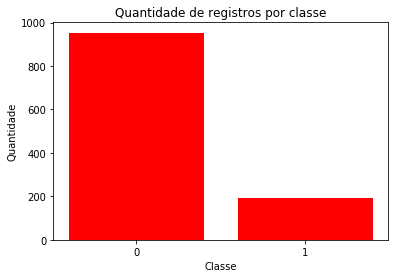

In [373]:
#Contagem de registros por classes
from turtle import color


target_counts = df_depressed_dataset['depressed'].value_counts()
positives = target_counts[1]
negatives = target_counts[0]

#Proporção em %
prop = (positives/negatives)*100
print('\nA variável target do treino possui {}% de positivos.'. format(round(prop,2)))

#Gráfico
plt.bar(target_counts.index, target_counts,color='red')
plt.xticks([0, 1])
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.title('Quantidade de registros por classe')


#### Tipos de dados nas colunas

Text(0.5, 1.0, 'Quantidade de colunas por tipos de dados')

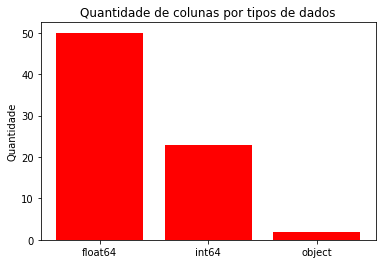

In [374]:
tipos_dados = df_depressed_dataset.dtypes.value_counts()

#Recurso visual
plt.bar(tipos_dados.index.astype(str), tipos_dados.values, color='red')
plt.ylabel('Quantidade')
plt.title('Quantidade de colunas por tipos de dados')

In [375]:
print('Podemos observar que temos variáveis em diferentes escalas\nO desvio padrão (std) alto')
df_depressed_dataset.describe()

Podemos observar que temos variáveis em diferentes escalas
O desvio padrão (std) alto


,surveyid,village,femaleres,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
count,1429.00000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1005.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1374.000000,1402.000000,1429.000000,900.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,904.000000,904.000000,1005.000000,1005.000000,1005.000000,560.000000,323.000000,680.000000,1005.000000,904.000000,895.000000,1005.000000,895.000000,1429.0,1429.0,71.000000,851.000000,851.000000,851.000000,846.000000,712.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1147.000000,1429.000000
mean,715.00000,76.286214,0.918125,0.772568,2.883135,4.899230,8.687194,2.041288,4.956219,126.105799,112.970888,144.797796,18.902193,10.165535,0.911025,0.000700,94.189418,8.278906,1.159212,0.638583,2.490822,1.671862,2.731175,3.561964,21.379253,0.179846,0.251924,0.107768,0.260322,0.032890,34.804122,17.235456,4.497855,1.933611,3.723105,21.440986,4.087124,0.918474,3.015487,0.452434,3.032836,0.264677,0.373134,5.612244,7.841135,3.608922,0.516922,0.492901,0.791305,1.924397,0.692294,1.0,1.0,0.509859,51.500386,18.057173,0.703054,1.337025,0.751030,0.213436,20.741777,284.918104,34.337696,0.013296,0.475194,0.070679,4.080613,3.605420,0.188943,2.114914,0.093772,0.169137,3.251225
std,412.66108,66.444012,0.274271,0.419320,1.874472,2.157894,2.923532,2.044081,2.130240,137.591884,237.350489,191.952725,27.552131,75.140134,1.598780,0.026454,112.210862,15.271976,6.350078,2.772324,11.559653,10.058019,7.910116,7.283909,27.628235,0.384194,0.434270,0.310195,0.438964,0.382984,250.224718,105.959383,8.293021,4.012755,11.631465,107.629227,6.327566,2.607594,5.412373,1.728997,2.212765,0.441381,0.483878,10.780444,17.363659,13.274940,0.321939,0.369836,0.339510,3.411772,0.379135,0.0,0.0,0.215925,109.813120,29.959977,0.338945,2.590840,0.830065,0.409876,716.126179,384.790615,144.221318,0.114579,5.857223,0.256377,28.574333,29.223058,0.391601,18.174208,0.291613,0.375036,1.694201
min,1.00000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-160.153700,0.000000,0.000000,0.000000,0.000000,0.000000
25%,358.00000,24.000000,1.000000,1.000000,

### Count NAN in each column

In [376]:
df_depressed_dataset.isnull().sum().sort_values().tail(30)

cons_ownfood                  0
cons_allfood                  0
asset_niceroof                0
asset_savings                 0
asset_land_owned_total        0
age                           1
cons_tobacco                 27
cons_alcohol                 55
depressed                   282
fs_enoughtom                424
hh_totalmembers             424
fs_meat                     424
med_sickdays_hhave          424
fs_sleephun                 424
med_portion_sickinjured     424
med_port_sick_child         525
fs_chskipm_often            525
fs_chwholed_often           525
cons_med_children           529
med_healthconsult           534
med_afford_port             534
ed_expenses                 578
ed_expenses_perkid          578
ed_schoolattend             578
ed_sch_missedpc             583
ed_work_act_pc              717
med_expenses_child_ep       749
med_expenses_hh_ep          869
med_expenses_sp_ep         1106
med_u5_deaths              1358
dtype: int64

## Detecção de outliers

Melhorar a perfomance do R² (score)

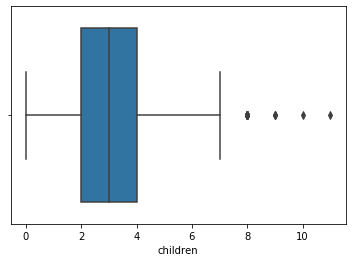

In [377]:
sns.boxplot(df_depressed_dataset.children)

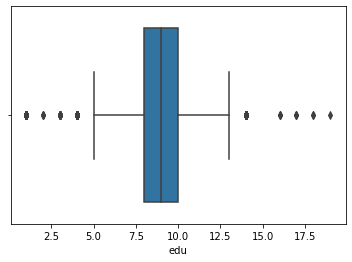

In [378]:
sns.boxplot(df_depressed_dataset.edu)

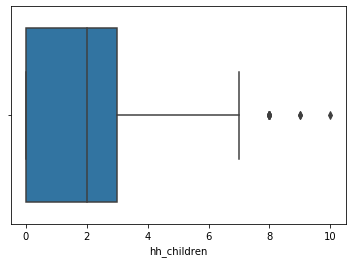

In [379]:
sns.boxplot(df_depressed_dataset.hh_children)

In [380]:
df_depressed_dataset

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,23-Nov-61,1,28,1,4,6,10,0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0,0.000000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0,0.0,0,0.000000,0.000000,1,0.000000,0,0.0,5
1,747,57,24-Oct-61,1,23,1,3,5,8,0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0,0.000000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0,0.0,1,4.804611,4.804611,0,0.000000,0,1.0,3
2,1190,115,05-Oct-61,1,22,1,3,5,9,0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0,0.000000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0,0.0,0,8.007685,8.007685,1,0.000000,0,0.0,5
3,1065,97,23-Sep-61,1,27,1,2,4,10,2,4.0,378.832920,526.671080,196.989040,24.023054,49.647648,0.00,0,289.173520,36.434967,0.0,0.0,4.163996,0.960922,1.681614,39.771500,44.042267,0,1,0,1,0,32.030739,0.0,22.288055,1.875133,16.282293,17.890503,0.0,0.0,0.0,0.0,3.0,1.0,1.0,NaN,NaN,NaN,0.000000,0.00,NaN,0.000000,NaN,1,1,NaN,20.179367,10.089684,0.500000,1.500000,0.000000,0,0,778.112300,69.219765,0,0.0,0,0.000000,0.000000,1,1.249199,0,0.0,0
4,806,42,12-Sep-61,0,59,0,4,6,10,4,6.0,258.671880,8.260629,173.526540,19.218445,0.000000,0.50,0,173.010990,0.870168,0.0,0.0,0.800768,0.800768,2.268844,8.087762,74.503502,1,0,0,0,0,0.000000,0.0,0.533846,2.073101,0.000000,2.073101,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,1.233183,0.333333,0.25,0.5,1.166667,1.0,1,1,NaN,27.226130,6.806532,0.750000,1.750000,1.250000,1,0,201.005620,4.341945,0,0.0,0,0.000000,0.000000,0,0.000000,0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,255,22,24-Sep-61,1,25,1,1,3,7,0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0,0.000000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0,0.0,0,0.000000,0.000000,0,0.000000,0,NaN,1
1425,547,69,23-Nov-61,1,28,1,4,6,10,4,6.0,248.608690,8.260629,157.110780,24.023054,24.023054,3.25,0,155.065580,10.476722,0.0,0.0,0.000000,0.000000,13.145949,8.808454,71.588707,0,1,0,0,0,0.000000,0.0,23.022095,10.215360,1.468075,10.215360,3.0,0

In [381]:
df_depressed_dataset.head(5)

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,23-Nov-61,1,28,1,4,6,10,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,0.000000,0.000000,1,0.000000,0,0.0,5
1,747,57,24-Oct-61,1,23,1,3,5,8,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,1,4.804611,4.804611,0,0.000000,0,1.0,3
2,1190,115,05-Oct-61,1,22,1,3,5,9,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,8.007685,8.007685,1,0.000000,0,0.0,5
3,1065,97,23-Sep-61,1,27,1,2,4,10,2,4.0,378.83292,526.671080,196.98904,24.023054,49.647648,0.0,0,289.17352,36.434967,0.0,0.0,4.163996,0.960922,1.681614,39.771500,44.042267,0,1,0,1,0,32.030739,0.0,22.288055,1.875133,16.282293,17.890503,0.0,0.0,0.0,0.0,3.0,1.0,1.0,NaN,NaN,NaN,0.000000,0.00,NaN,0.000000,NaN,1,1,NaN,20.179367,10.089684,0.50,1.50,0.00,0,0,778.11230,69.219765,0,0.0,0,0.000000,0.000000,1,1.249199,0,0.0,0
4,806,42,12-Sep-61,0,59,0,4,6,10,4,6.0,258.67188,8.260629,173.52654,19.218445,0.000000,0.5,0,173.01099,0.870168,0.0,0.0,0.800768,0.800768,2.268844,8.087762,74.503502,1,0,0,0,0,0.000000,0.0,0.533846,2.073101,0.000000,2.073101,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,1.233183,0.333333,0.25,0.5,1.166667,1.0,1,1,NaN,27.226130,6.806532,0.75,1.75,1.25,1,0,201.00562,4.341945,0,0.0,0,0.000000,0.000000,0,0.000000,0,0.0,3


                    surveyid   village  femaleres   married  children  \
surveyid            1.000000  0.662523   0.025015 -0.011441  0.020242   
village             0.662523  1.000000   0.010970  0.026970  0.030428   
femaleres           0.025015  0.010970   1.000000  0.282472  0.214297   
married            -0.011441  0.026970   0.282472  1.000000  0.227206   
children            0.020242  0.030428   0.214297  0.227206  1.000000   
...                      ...       ...        ...       ...       ...   
saved_mpesa         0.045454  0.047495   0.007214  0.078497  0.043458   
amount_saved_mpesa  0.005823 -0.007197  -0.009764  0.024066 -0.003852   
early_survey       -0.059211 -0.062321  -0.000251 -0.003002 -0.029901   
depressed          -0.021138  0.014286  -0.007864 -0.081358  0.009313   
day_of_week        -0.004995 -0.043296   0.000593 -0.048648  0.020938   

                      hhsize       edu  hh_children  hh_totalmembers  \
surveyid            0.017840 -0.037984    -0.002915

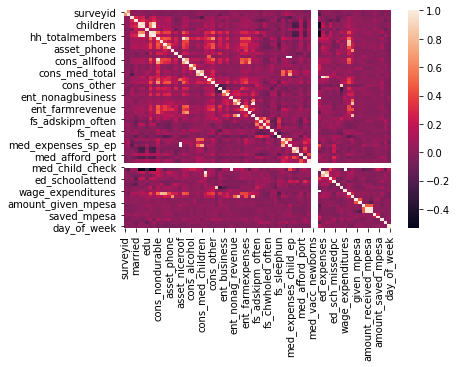

In [382]:
# correlation 
print(df_depressed_dataset.corr())
ax = sns.heatmap(df_depressed_dataset.corr())

## ii) pré-processamento dos dados
abordando aspectos como 
- correção de outliers e de valores faltantes, 
- normalização, 
- ajuste de desbalanceamento de classes 
- redução de dimensionalidade

#### Removendo colunas irrelevantes


In [383]:
# Colunas categoricas
print(df_depressed_dataset.select_dtypes(include=['object']).columns.tolist())

# Print shape do DataFrame original
print("Shape do DataFrame original: {}".format(df_depressed_dataset.shape))

# Não tenho tempo para trabalhar com colunas de data agora
df_depressed_dataset.drop(columns=['surveyid','village','survey_date','hhsize','cons_nondurable',
'asset_livestock','asset_durable','asset_phone','asset_land_owned_total',
'asset_niceroof','cons_allfood','cons_ownfood','cons_med_total',
'cons_med_children','cons_ed','cons_social','cons_other','ent_wagelabor',
'ent_ownfarm','ent_business','ent_nonagbusiness','ent_employees',
'ent_nonag_revenue','ent_nonag_flowcost','ent_farmrevenue','ent_farmexpenses',
 'ent_animalstockrev','ent_total_cost','fs_adskipm_often','fs_adwholed_often',
 'fs_chskipm_often','fs_chwholed_often','fs_meat','fs_enoughtom','fs_sleephun',
 'med_expenses_hh_ep','med_expenses_sp_ep','med_expenses_child_ep',
 'med_portion_sickinjured','med_port_sick_child','med_afford_port','med_sickdays_hhave',
 'med_healthconsult','med_vacc_newborns','med_child_check','med_u5_deaths','ed_expenses',
 'ed_expenses_perkid','ed_schoolattend','ed_sch_missedpc',
 'ed_work_act_pc','labor_primary','wage_expenditures','early_survey','day_of_week'], axis=1, inplace=True)


# Print shape do novo DataFrame
print("Shape of DataFrame depois as colunas irrelevantes: {}".format(df_depressed_dataset.shape))
# durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa



['survey_date', 'age']
Shape do DataFrame original: (1429, 75)
Shape of DataFrame depois as colunas irrelevantes: (1429, 20)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f202ed9c650>,
      dtype=object)

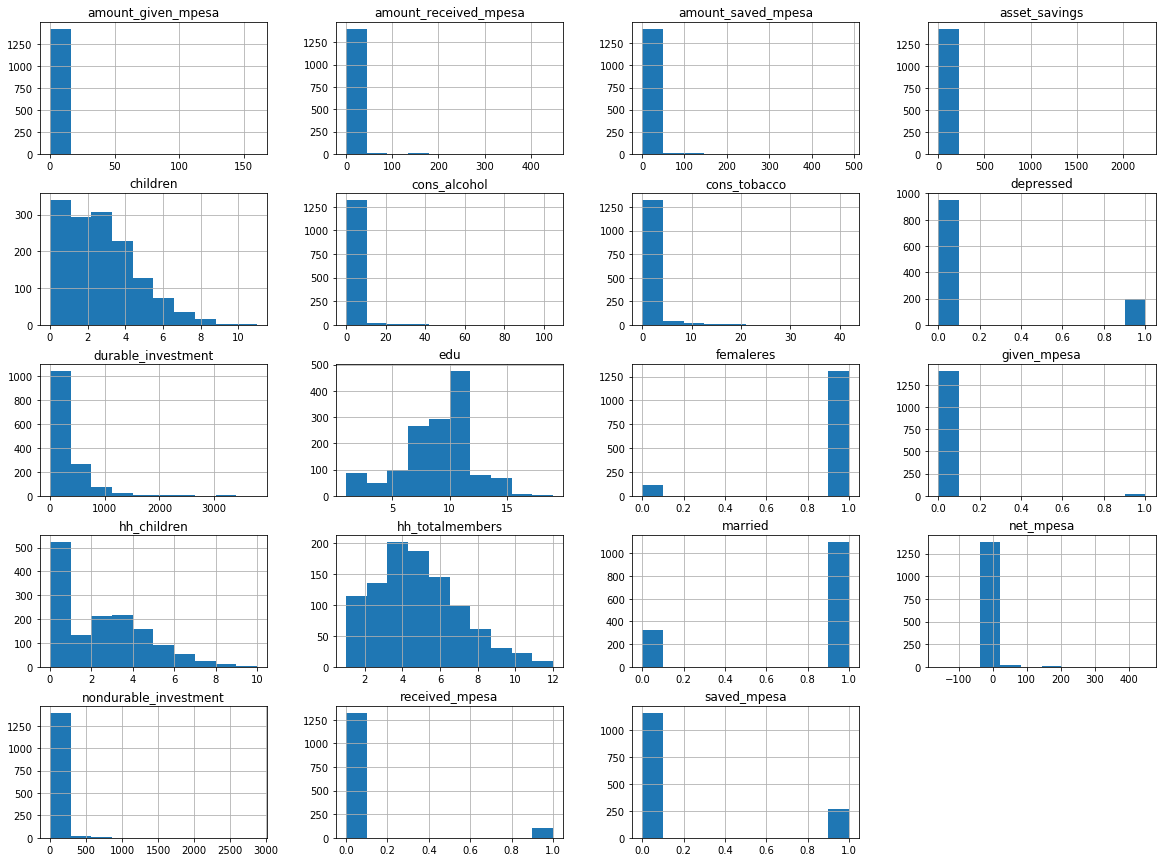

In [384]:
df_depressed_dataset.columns
df_depressed_dataset.hist(figsize=[20, 15])

### Removendo NAN


In [385]:
df_depressed_dataset.columns

Index(['femaleres', 'age', 'married', 'children', 'edu', 'hh_children',
       'hh_totalmembers', 'asset_savings', 'cons_alcohol', 'cons_tobacco',
       'durable_investment', 'nondurable_investment', 'given_mpesa',
       'amount_given_mpesa', 'received_mpesa', 'amount_received_mpesa',
       'net_mpesa', 'saved_mpesa', 'amount_saved_mpesa', 'depressed'],
      dtype='object')

In [386]:
df_depressed_dataset

,femaleres,age,married,children,edu,hh_children,hh_totalmembers,asset_savings,cons_alcohol,cons_tobacco,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,depressed
0,1,28,1,4,10,0,NaN,0.000000,0.0,0.0,0.000000,0.000000,0,0.0,0,0.000000,0.000000,1,0.000000,0.0
1,1,23,1,3,8,0,NaN,0.000000,0.0,0.0,0.000000,0.000000,0,0.0,1,4.804611,4.804611,0,0.000000,1.0
2,1,22,1,3,9,0,NaN,0.000000,0.0,0.0,0.000000,0.000000,0,0.0,0,8.007685,8.007685,1,0.000000,0.0
3,1,27,1,2,10,2,4.0,49.647648,0.0,0.0,778.112300,69.219765,0,0.0,0,0.000000,0.000000,1,1.249199,0.0
4,0,59,0,4,10,4,6.0,0.000000,0.0,0.0,201.005620,4.341945,0,0.0,0,0.000000,0.000000,0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1,25,1,1,7,0,NaN,0.000000,0.0,0.0,0.000000,0.000000,0,0.0,0,0.000000,0.000000,0,0.000000,NaN
1425,1,28,1,4,10,4,6.0,24.023054,0.0,0.0,182.347700,47.384361,0,0.0,0,0.000000,0.000000,1,0.000000,NaN
1426,1,66,0,0,1,0,1.0,0.000000,0.0,0.0,46.444572,0.104545,0,0.0,0,0.000000,0.000000,0,0.000000,NaN
1427,1,51,1,1,12,0,NaN,0.000000,0.0,0.0,0.000000,0.000000,0,0.0,0,0.000000,0.000000,0,0.000000,NaN


In [387]:
df_columns = ['depressed']

for df_column in df_columns:
   print(df_column)
   drop_nan = df_depressed_dataset.drop(df_depressed_dataset[(df_depressed_dataset[df_column].isnull())].index, axis=0, inplace=True)

df_filter = df_depressed_dataset.isnull().sum()

df_filter

depressed


femaleres                  0
age                        0
married                    0
children                   0
edu                        0
hh_children                0
hh_totalmembers          334
asset_savings              0
cons_alcohol              44
cons_tobacco              20
durable_investment         0
nondurable_investment      0
given_mpesa                0
amount_given_mpesa         0
received_mpesa             0
amount_received_mpesa      0
net_mpesa                  0
saved_mpesa                0
amount_saved_mpesa         0
depressed                  0
dtype: int64

### Balanceamento de classes

In [388]:
""" 
from cmath import nan
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

X = df_depressed_dataset.drop(target_column_name, axis=1).fillna(0)
y = df_depressed_dataset[target_column_name]

# undersampling e oversampling

rus = RandomUnderSampler(random_state=0, sampling_strategy={0:600})
x_novo, y_novo = rus.fit_resample(X, y)
print(sorted(Counter(y_novo).items()))

df_depressed_dataset.iloc[:,:-1] =  x_novo
df_depressed_dataset[target_column_name] = y_novo
df_depressed_dataset = df_depressed_dataset.dropna()

rus = RandomOverSampler(random_state=0, sampling_strategy={1:300})
x_novo, y_novo = rus.fit_resample(x_novo, y_novo)
print(sorted(Counter(y_novo).items()))

df_depressed_dataset.iloc[:,:-1] =  x_novo
df_depressed_dataset[target_column_name] = y_novo
df_depressed_dataset = df_depressed_dataset.dropna()

 """

' \nfrom cmath import nan\nfrom collections import Counter\nfrom imblearn.under_sampling import RandomUnderSampler\nfrom imblearn.over_sampling import RandomOverSampler\n\nX = df_depressed_dataset.drop(target_column_name, axis=1).fillna(0)\ny = df_depressed_dataset[target_column_name]\n\n# undersampling e oversampling\n\nrus = RandomUnderSampler(random_state=0, sampling_strategy={0:600})\nx_novo, y_novo = rus.fit_resample(X, y)\nprint(sorted(Counter(y_novo).items()))\n\ndf_depressed_dataset.iloc[:,:-1] =  x_novo\ndf_depressed_dataset[target_column_name] = y_novo\ndf_depressed_dataset = df_depressed_dataset.dropna()\n\nrus = RandomOverSampler(random_state=0, sampling_strategy={1:300})\nx_novo, y_novo = rus.fit_resample(x_novo, y_novo)\nprint(sorted(Counter(y_novo).items()))\n\ndf_depressed_dataset.iloc[:,:-1] =  x_novo\ndf_depressed_dataset[target_column_name] = y_novo\ndf_depressed_dataset = df_depressed_dataset.dropna()\n\n '

#### Removendo outliers 

Z score = (x -mean) / std. deviation

- df antes:  (1409, 23)


children

m
 2.858761987794246 
s
 1.84799885689498
2 - 
m
 2.858761987794246 
s
 1.84799885689498
edu

m
 8.729020979020978 
s
 2.8750184711319884
2 - 
m
 8.729020979020978 
s
 2.8750184711319884
hh_children

m
 2.0087642418930765 
s
 1.9964719885425632
2 - 
m
 2.0087642418930765 
s
 1.9964719885425632
hh_totalmembers

m
 4.8325 
s
 2.011701705024885
2 - 
m
 4.8325 
s
 2.011701705024885
asset_savings

m
 10.051351053421753 
s
 80.0248602105095
2 - 
m
 10.051351053421753 
s
 80.0248602105095
cons_alcohol

m
 1.1661409448658653 
s
 6.7169092805088235
2 - 
m
 1.1661409448658653 
s
 6.7169092805088235
cons_tobacco

m
 0.4906494442647059 
s
 2.112132377331121
2 - 
m
 0.4906494442647059 
s
 2.112132377331121
durable_investment

m
 278.22816083023037 
s
 376.170897258546
2 - 
m
 278.22816083023037 
s
 376.170897258546
nondurable_investment

m
 28.386524282193648 
s
 105.96108392551352
2 - 
m
 28.386524282193648 
s
 105.96108392551352
given_mpesa

m
 0.013245033112582781 
s
 0.114322360937961

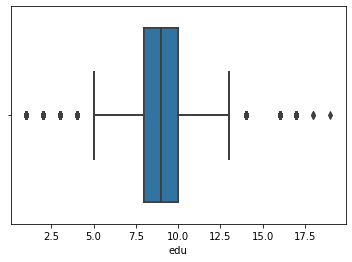

In [389]:
df_columns_z = ['children', 'edu', 'hh_children',
       'hh_totalmembers', 'asset_savings', 'cons_alcohol', 'cons_tobacco',
       'durable_investment', 'nondurable_investment', 'given_mpesa',
       'amount_given_mpesa', 'received_mpesa', 'amount_received_mpesa',
       'net_mpesa', 'saved_mpesa', 'amount_saved_mpesa']

for column in df_columns_z:
    print(column)
    m = np.mean(df_depressed_dataset[column])
    s = np.std(df_depressed_dataset[column])
    print('\nm\n', m, '\ns\n', s)
    df_depressed_dataset['Z-score'] = (df_depressed_dataset[column] - m)/s
    df_outlier = df_depressed_dataset[abs(df_depressed_dataset['Z-score']) > 3]
    df_depressed_dataset = df_depressed_dataset.drop(df_outlier.index)
    print('2 - \nm\n', m, '\ns\n', s)
    sns.boxplot(x=df_depressed_dataset.edu)

df_depressed_dataset.drop('Z-score', axis=1, inplace=True)

#### Remove registros duplicados

In [390]:
# Função que deleta registros duplicados da base (Mantendo apenas o primeiro registro a cada grupo de duplicatas)
def DupRegClean(df):
    # Registros duplicados podem causar ruído nos algoritmos de machine learning portanto iremos excluí-los.
    # (Se por acaso colunas duplicadas estierem presentes nos datasets de treino e teste, os resultados podem se mostrar tendenciosos).
    print('df antes: ',df.shape)
    df_saida = df.drop_duplicates(inplace=False,keep='first')
    print('Após a limpeza de registros duplicados: ',df_saida.shape)
    return df_saida

# Aplica limpeza
df1 = DupRegClean(df_depressed_dataset)

df antes:  (963, 20)
Após a limpeza de registros duplicados:  (941, 20)


#### Divisão do dataset


O dataset de treino possui:  20.5 % de classes positivas

O dataset de teste possui:  20.62 % de classes positivas


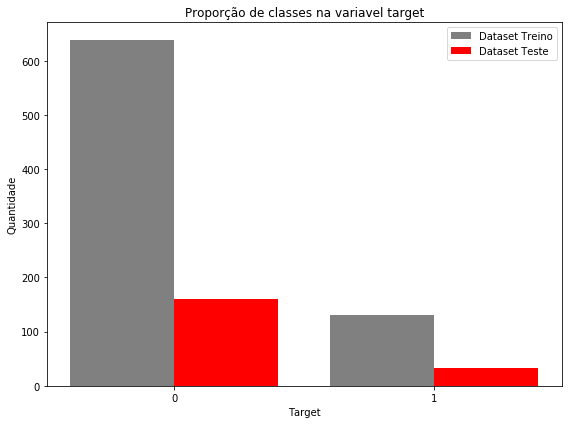

,femaleres,age,married,children,edu,hh_children,hh_totalmembers,asset_savings,cons_alcohol,cons_tobacco,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa
597,1,28,1,2,10,2,4.0,0.000000,0.0,0.0,403.82764,13.237148,0,0.0,0,0.0,0.0,0,0.000000
514,1,37,0,2,9,0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0,0.0,0,0.0,0.0,1,0.000000
977,1,42,1,4,10,0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0,0.0,0,0.0,0.0,0,0.000000
231,1,47,1,4,6,0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0,0.0,0,0.0,0.0,0,0.000000
1056,1,20,1,6,9,0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0,0.0,0,0.0,0.0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,1,21,1,3,10,3,5.0,4.804611,0.0,0.0,224.16881,7.073455,0,0.0,0,0.0,0.0,1,8.007685
290,1,43,1,4,10,4,6.0,0.000000,0.0,0.0,459.89407,32.146408,0,0.0,0,0.0,0.0,0,0.000000
529,1,73,0,0,1,0,2.0,0.000000,0.0,0.0,446.86060,7.240282,0,0.0,0,0.0,0.0,0,0.000000
495,0,23,1,1,10,1,2.0,0.000000,0.0,0.0,479.33496,2.079774,0,0.0,0,0.0,0.0,0,0.000000


In [391]:

#  Separando as variáveis da target
X = df_depressed_dataset.drop(target_column_name, axis=1).fillna(0)
y = df_depressed_dataset[target_column_name]

# Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)

# Observando as proporções de classes nas targets do dataset de treino e teste (o objetivo é ter uma proporção semelhante)
fig,ax = plt.subplots(figsize=(8,6))
treino_b = ax.bar(y_train.value_counts().index-0.2,y_train.value_counts().values,0.4, color='gray',label='Dataset Treino')
teste_b  = ax.bar( y_test.value_counts().index+0.2,y_test.value_counts().values ,0.4, color='red' , label='Dataset Teste')

# Percentuais
perc_tr = (y_train.value_counts().values[1]/y_train.value_counts().values[0])*100
print('\nO dataset de treino possui: ',round(perc_tr,2),'% de classes positivas')
perc_ts = (y_test.value_counts().values[1]/y_test.value_counts().values[0])*100
print('\nO dataset de teste possui: ',round(perc_ts,2),'% de classes positivas')

# Recurso visual
ax.set_ylabel('Quantidade')
ax.set_xlabel('Target')
ax.set_title('Proporção de classes na variavel target')
ax.set_xticks([0,1])
ax.legend()
fig.tight_layout()
plt.show()
X_train

#### Imputação dos valores

In [392]:
""" from sklearn.impute import KNNImputer 

imputer = KNNImputer(n_neighbors=5)
#columnsDropNan = df_depressed_dataset[['hh_totalmembers', 'cons_alcohol', 'cons_tobacco']] 
#df_depressed_dataset[['hh_totalmembers', 'cons_alcohol', 'cons_tobacco']] = imputer.fit_transform(columnsDropNan.values) 

for column in ['hh_totalmembers', 'cons_alcohol', 'cons_tobacco']:
       column_index = df_depressed_dataset.columns.get_loc(column)
       X_train_normalized = imputer.fit_transform(X_train.iloc[:,column_index].values.reshape(-1, 1))
       X_test_normalized = imputer.fit_transform(X_test.iloc[:,column_index].values.reshape(-1, 1))
       X_train.iloc[:,column_index] = X_train_normalized
       X_test.iloc[:,column_index] = X_test_normalized

 """

" from sklearn.impute import KNNImputer \n\nimputer = KNNImputer(n_neighbors=5)\n#columnsDropNan = df_depressed_dataset[['hh_totalmembers', 'cons_alcohol', 'cons_tobacco']] \n#df_depressed_dataset[['hh_totalmembers', 'cons_alcohol', 'cons_tobacco']] = imputer.fit_transform(columnsDropNan.values) \n\nfor column in ['hh_totalmembers', 'cons_alcohol', 'cons_tobacco']:\n       column_index = df_depressed_dataset.columns.get_loc(column)\n       X_train_normalized = imputer.fit_transform(X_train.iloc[:,column_index].values.reshape(-1, 1))\n       X_test_normalized = imputer.fit_transform(X_test.iloc[:,column_index].values.reshape(-1, 1))\n       X_train.iloc[:,column_index] = X_train_normalized\n       X_test.iloc[:,column_index] = X_test_normalized\n\n "

In [393]:
df_filter = df_depressed_dataset.isnull().sum()
df_filter

femaleres                  0
age                        0
married                    0
children                   0
edu                        0
hh_children                0
hh_totalmembers          306
asset_savings              0
cons_alcohol              39
cons_tobacco              19
durable_investment         0
nondurable_investment      0
given_mpesa                0
amount_given_mpesa         0
received_mpesa             0
amount_received_mpesa      0
net_mpesa                  0
saved_mpesa                0
amount_saved_mpesa         0
depressed                  0
dtype: int64

In [394]:
df_depressed_dataset

,femaleres,age,married,children,edu,hh_children,hh_totalmembers,asset_savings,cons_alcohol,cons_tobacco,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,depressed
0,1,28,1,4,10,0,NaN,0.000000,0.0,0.000000,0.000000,0.000000,0,0.0,0,0.0,0.0,1,0.000000,0.0
3,1,27,1,2,10,2,4.0,49.647648,0.0,0.000000,778.112300,69.219765,0,0.0,0,0.0,0.0,1,1.249199,0.0
4,0,59,0,4,10,4,6.0,0.000000,0.0,0.000000,201.005620,4.341945,0,0.0,0,0.0,0.0,0,0.000000,0.0
5,1,35,1,6,10,6,8.0,0.000000,NaN,5.582501,444.256100,7.662910,0,0.0,0,0.0,0.0,0,0.000000,0.0
6,0,34,0,1,9,1,3.0,0.000000,0.0,0.000000,225.622880,0.556089,0,0.0,0,0.0,0.0,0,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,1,39,1,0,12,0,4.0,32.030739,0.0,0.000000,612.799560,44.197971,0,0.0,0,0.0,0.0,0,0.000000,1.0
1143,1,21,0,3,10,3,4.0,0.000000,0.0,0.000000,569.850340,48.166222,0,0.0,0,0.0,0.0,1,0.000000,0.0
1144,1,44,1,6,6,6,8.0,12.812296,NaN,0.000000,252.650100,14.711897,0,0.0,0,0.0,0.0,0,0.000000,0.0
1145,1,23,1,1,7,1,3.0,0.000000,0.0,0.000000,141.736020,0.720692,0,0.0,0,0.0,0.0,1,0.080077,0.0



A variável target do treino possui 20.53% de positivos.


Text(0.5, 1.0, 'Quantidade de registros por classe')

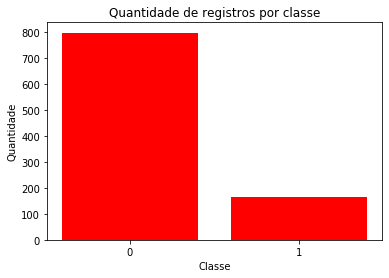

In [395]:
target_counts = df_depressed_dataset['depressed'].value_counts()
positives = target_counts[1]
negatives = target_counts[0]

#Proporção em %
prop = (positives/negatives)*100
print('\nA variável target do treino possui {}% de positivos.'. format(round(prop,2)))

#Gráfico
plt.bar(target_counts.index, target_counts,color='red')
plt.xticks([0, 1])
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.title('Quantidade de registros por classe')

In [396]:
df_depressed_dataset

,femaleres,age,married,children,edu,hh_children,hh_totalmembers,asset_savings,cons_alcohol,cons_tobacco,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,depressed
0,1,28,1,4,10,0,NaN,0.000000,0.0,0.000000,0.000000,0.000000,0,0.0,0,0.0,0.0,1,0.000000,0.0
3,1,27,1,2,10,2,4.0,49.647648,0.0,0.000000,778.112300,69.219765,0,0.0,0,0.0,0.0,1,1.249199,0.0
4,0,59,0,4,10,4,6.0,0.000000,0.0,0.000000,201.005620,4.341945,0,0.0,0,0.0,0.0,0,0.000000,0.0
5,1,35,1,6,10,6,8.0,0.000000,NaN,5.582501,444.256100,7.662910,0,0.0,0,0.0,0.0,0,0.000000,0.0
6,0,34,0,1,9,1,3.0,0.000000,0.0,0.000000,225.622880,0.556089,0,0.0,0,0.0,0.0,0,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,1,39,1,0,12,0,4.0,32.030739,0.0,0.000000,612.799560,44.197971,0,0.0,0,0.0,0.0,0,0.000000,1.0
1143,1,21,0,3,10,3,4.0,0.000000,0.0,0.000000,569.850340,48.166222,0,0.0,0,0.0,0.0,1,0.000000,0.0
1144,1,44,1,6,6,6,8.0,12.812296,NaN,0.000000,252.650100,14.711897,0,0.0,0,0.0,0.0,0,0.000000,0.0
1145,1,23,1,1,7,1,3.0,0.000000,0.0,0.000000,141.736020,0.720692,0,0.0,0,0.0,0.0,1,0.080077,0.0


In [397]:
df_depressed_dataset.head()

,femaleres,age,married,children,edu,hh_children,hh_totalmembers,asset_savings,cons_alcohol,cons_tobacco,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,depressed
0,1,28,1,4,10,0,NaN,0.000000,0.0,0.000000,0.00000,0.000000,0,0.0,0,0.0,0.0,1,0.000000,0.0
3,1,27,1,2,10,2,4.0,49.647648,0.0,0.000000,778.11230,69.219765,0,0.0,0,0.0,0.0,1,1.249199,0.0
4,0,59,0,4,10,4,6.0,0.000000,0.0,0.000000,201.00562,4.341945,0,0.0,0,0.0,0.0,0,0.000000,0.0
5,1,35,1,6,10,6,8.0,0.000000,NaN,5.582501,444.25610,7.662910,0,0.0,0,0.0,0.0,0,0.000000,0.0
6,0,34,0,1,9,1,3.0,0.000000,0.0,0.000000,225.62288,0.556089,0,0.0,0,0.0,0.0,0,0.000000,1.0


In [398]:
df_depressed_dataset.columns

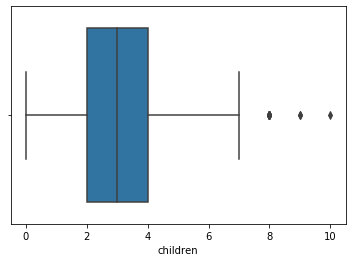

In [ ]:
sns.boxplot(df_depressed_dataset.children)

In [ ]:
df_depressed_dataset

,femaleres,age,married,children,edu,hh_children,hh_totalmembers,asset_savings,cons_alcohol,cons_tobacco,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,depressed
0,1,28,1,4,10,0,NaN,0.000000,0.0,0.0,0.000000,0.000000,0,0.0,0,0.000000,0.000000,1,0.000000,0.0
1,1,23,1,3,8,0,NaN,0.000000,0.0,0.0,0.000000,0.000000,0,0.0,1,4.804611,4.804611,0,0.000000,1.0
2,1,22,1,3,9,0,NaN,0.000000,0.0,0.0,0.000000,0.000000,0,0.0,0,8.007685,8.007685,1,0.000000,0.0
3,1,27,1,2,10,2,4.0,49.647648,0.0,0.0,778.112300,69.219765,0,0.0,0,0.000000,0.000000,1,1.249199,0.0
4,0,59,0,4,10,4,6.0,0.000000,0.0,0.0,201.005620,4.341945,0,0.0,0,0.000000,0.000000,0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,1,39,1,0,12,0,4.0,32.030739,0.0,0.0,612.799560,44.197971,0,0.0,0,0.000000,0.000000,0,0.000000,1.0
1143,1,21,0,3,10,3,4.0,0.000000,0.0,0.0,569.850340,48.166222,0,0.0,0,0.000000,0.000000,1,0.000000,0.0
1144,1,44,1,6,6,6,8.0,12.812296,NaN,0.0,252.650100,14.711897,0,0.0,0,0.000000,0.000000,0,0.000000,0.0
1145,1,23,1,1,7,1,3.0,0.000000,0.0,0.0,141.736020,0.720692,0,0.0,0,0.000000,0.000000,1,0.080077,0.0


#### Padronização das features para aplicação do modelo

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# column_names_to_normalize = ['children', 'edu', 'hh_children',
#        'hh_totalmembers', 'asset_savings', 'cons_alcohol', 'cons_tobacco',
#        'durable_investment', 'nondurable_investment', 'given_mpesa',
#        'amount_given_mpesa', 'received_mpesa', 'amount_received_mpesa',
#        'net_mpesa', 'saved_mpesa', 'amount_saved_mpesa']

# for column in column_names_to_normalize:
#        column_index = df_depressed_dataset.columns.get_loc(column)
#        X_train_normalized = scaler.fit_transform(X_train.iloc[:,column_index].values.reshape(-1, 1))
#        X_test_normalized = scaler.fit_transform(X_test.iloc[:,column_index].values.reshape(-1, 1))
#        df_depressed_dataset[column] = np.concatenate([X_train_normalized, X_test_normalized])



# print(df_depressed_dataset)


## iii) treinamento e validação dos modelos,
utilizando as melhores práticas em relação a estratégias de divisão de dados para otimização de hiperparâmetros e
seleção de modelos

 - Acurácia
 - Precision
 - Recall
 - F1 Score
 - ROC AUC score

### Classificação 
Métodos baseados em instâncias
○ K-Vizinhos Mais Próximos
● Métodos baseados em procura
○ Árvores de decisão
● Métodos probabilísticos
○ Naïve Bayes
● Métodos estatísticos
○ Regressão Linear e Regressão Logística
● Métodos baseados em otimização
○ Redes Neurais Artificiais
● Métodos baseados em múltiplos modelos preditivos
○ Florestas Aleatórias, Adaboost, e outros

k neighbors
=>
Score:  0.49  Desv_padr:  0.06
=>
Recall: 0.07741935483870968
=>
Precision:  0.3083333333333333
=>
Mean squared error:  0.1832086006177239
=>
f1 score  0.042533936651583705
=>
Matriz de confusão 
 [[738  24]
 [142  13]]
random forest
=>
Score:  0.5  Desv_padr:  0.03
=>
Recall: 0.03225806451612903
=>
Precision:  0.21071428571428572
=>
Mean squared error:  0.1832086006177239
=>
f1 score  0.042533936651583705
=>
Matriz de confusão 
 [[748  14]
 [148   7]]
naive bayes
=>
Score:  0.56  Desv_padr:  0.01
=>
Recall: 0.7225806451612904
=>
Precision:  0.1967141655720476
=>
Mean squared error:  0.1832086006177239
=>
f1 score  0.042533936651583705
=>
Matriz de confusão 
 [[252 510]
 [ 43 112]]
log regression
=>
Score:  0.54  Desv_padr:  0.03
=>
Recall: 0.4516129032258065
=>
Precision:  0.19325220887979033
=>
Mean squared error:  0.1832086006177239
=>
f1 score  0.042533936651583705
=>
Matriz de confusão 
 [[479 283]
 [ 89  66]]
decision tree
=>
Score:  0.49  Desv_padr:  0.03
=>
Recal

[-1, 7, -1, 1.5]

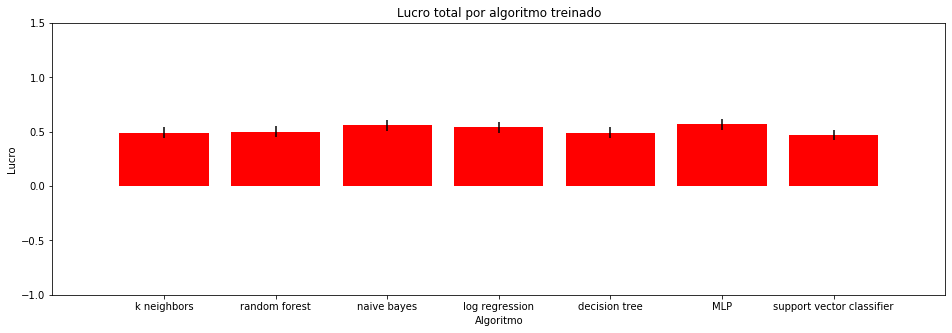

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
#from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import recall_score, mean_squared_error, confusion_matrix, f1_score

# Parâmetros iniciais para cada algoritmo (Vamos buscar ajustar inicialmente os 
# hiperparametros para trabalharem com a target desbalanceada)
naive_bayes_params = [{}]
#xgb_params         = [{"scale_pos_weight":5,"random_state":42}] # 100% de targets dividido pela quantidade 
                                                                # de positivos (20%) = 5
kneighbors_params  = [{"weights":"distance"}] 
svc_params         = [{"class_weight":"balanced", "random_state":42}]
log_reg_params     = [{"class_weight":"balanced","max_iter":10000, "random_state":42}]
dec_tree_params    = [{"class_weight":"balanced", "random_state":42}]
rand_for_params    = [{"class_weight":"balanced","random_state":42}]
mlp_for_params     = [{"activation":"identity", "random_state":42}]

modelclasses = [
     ["naive bayes",       GaussianNB,                 naive_bayes_params]
    #,["XGBoost",           XGBClassifier,                      xgb_params]
    ,["k neighbors",       KNeighborsClassifier,        kneighbors_params]
    ,["support vector classifier", LinearSVC,                  svc_params]
    ,["log regression",    LogisticRegression,             log_reg_params]
    ,["decision tree",     DecisionTreeClassifier,        dec_tree_params]
    ,["random forest",     RandomForestClassifier,        rand_for_params]
    ,["MLP",     MLPClassifier,        mlp_for_params]

]

insights = []
#  Treina e testa cada algoritmo com seus respectivos hiperparâmetros
for modelname, Model, params_list in modelclasses:
    for params in params_list:
        model = Model(**params)
        cv_scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=5)
        score = round(cv_scores.mean(),2)
        recall = cross_val_score(model, X_train, y_train, scoring='recall', cv=5)
        precision = cross_val_score(model, X_train, y_train, scoring='precision', cv=5)
        f1score = cross_val_score(model, X_train, y_train, scoring='f1', cv=5)
        f1score_mean = f1score.mean()
        meanSquaredError = cross_val_score(model, X_train, y_train, 
        scoring='neg_mean_squared_error', cv=5)
        recall_mean = recall.mean()
        precision_mean = precision.mean()
        squared_mean = meanSquaredError.mean()
        score_stddev = round(cv_scores.std(),2)
        y_pred = cross_val_predict(model, X_train, y_train, cv=10)
        conf_mat = confusion_matrix(y_train, y_pred)
        insights.append((modelname, model, params, score,
        score_stddev, recall_mean, precision_mean, conf_mat))

        
insights.sort(key=lambda x:x[-2], reverse=True)

# resultados
modelnames = []
scores = []
for modelname, model, params, score, score_stddev, recall_mean, precision_mean, conf_mat in insights:
    print(modelname)
    print('=>\nScore: ',score, ' Desv_padr: ',score_stddev)
    print("=>\nRecall:", recall_mean)
    print("=>\nPrecision: ", precision_mean)
    print("=>\nMean squared error: ", squared_mean*(-1))
    print("=>\nf1 score ", f1score_mean)
    print("=>\nMatriz de confusão \n", conf_mat)
    modelnames.append(modelname)
    scores.append(score)
    
# Recurso visual
plt.figure(figsize=(16,5))
plt.bar(modelnames, scores, color='red', yerr=score_stddev)
plt.ylabel('Lucro')
plt.xlabel('Algoritmo')
plt.title('Lucro total por algoritmo treinado')
plt.axis([-1,len(modelnames),-1,1.5])

In [ ]:
! pip install xgboost


In [ ]:
colunas = X_train.columns

### III.I Aprimoramento de hiperparâmetros

In [ ]:
from sklearn.model_selection import validation_curve, RandomizedSearchCV

class HyperParameterEvaluator:
    """
    Responsible for performing a search in order to discover the set of 
    specific model configuration arguments that result in the best performance 
    of the model on a test coverage dataset.
    """
    
    # -------------------------------------------------------------------------
    #           Constructor
    # -------------------------------------------------------------------------
    def __init__(self, dataframe, regressor, predictable_column, hyperparameters):
        """
        Performs a search in order to discover the set of specific model 
        configuration arguments that result in the best performance of the model
        on a test coverage dataset.
        
        :param      dataframe: Dataset to be evaluated
        :param      regressor: Machine learning algorithm
        :param      predictable_column: Column name to be predicted
        :param      hyperparameters: Hyperparameters to be analyzed. It must be
        a dictionary, where each key is the hyperparameter name and each value
        is a list of hyperparameter values to be analyzed
        """
        self.__dataset = dataframe
        self.__regressor = regressor
        self.__train_score = 0
        self.__test_score = 0
        self.__predictable_column = predictable_column
        self.__hyperparameters = hyperparameters
        
        
    # -------------------------------------------------------------------------
    #           Methods
    # -------------------------------------------------------------------------
    def evaluate_validation_curve(self, metrics):
        for name, values in self.__hyperparameters.items():
            self.__evaluate_validation_curve(name, values, metrics)
        
    def __evaluate_validation_curve(self, param_name, param_range, metrics):
        self.__build_validation_curve(param_name, param_range, metrics)
        self.__build_validation_curve_chart(param_range, param_name)
        self.__display_current_chart()
        
    def __build_validation_curve(self, param_name, param_range, metrics):
        self.__train_score, self.__test_score = validation_curve(
                self.__regressor,
                X = self.__dataset[metrics].values, 
                y = self.__dataset[self.__predictable_column].values, 
                param_name = param_name, 
                param_range = param_range,
        )
        
    def __build_validation_curve_chart(self, param_range, param_name):
        self.__build_chart_title(param_name)
        self.__build_chart_axis()
        self.__build_chart_training_score_data(param_range)
        self.__build_chart_cross_validation_score_data(param_range)
        self.__build_chart_legend()
        
    def __build_chart_title(self, param_name):
        plt.title("Validation Curve - " + param_name)
        
    def __build_chart_axis(self):
        plt.xlabel(r"$\gamma$")
        plt.ylabel("Score")
        plt.ylim(0.0, 1.1)
        
    def __build_chart_legend(self):
        plt.legend(loc="best")
        
    def __build_chart_training_score_data(self, param_range):
        train_scores_mean = np.mean(self.__train_score, axis=1)
        train_scores_std = np.std(self.__train_score, axis=1)
        test_scores_mean = np.mean(self.__test_score, axis=1)
        test_scores_std = np.std(self.__test_score, axis=1)
        
        plt.semilogx(param_range, train_scores_mean, label="Training score",
                     color="darkorange", lw=2)
        plt.fill_between(param_range, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.2,
                         color="darkorange", lw=2)
        
    def __build_chart_cross_validation_score_data(self, param_range):
        train_scores_mean = np.mean(self.__train_score, axis=1)
        train_scores_std = np.std(self.__train_score, axis=1)
        test_scores_mean = np.mean(self.__test_score, axis=1)
        test_scores_std = np.std(self.__test_score, axis=1)
        
        plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                     color="navy", lw=2)
        plt.fill_between(param_range, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.2,
                         color="navy", lw=2)
        
    def __display_current_chart(self):
        plt.show()
        
    def evaluate_hyperparam(self, metrics, hyperparam_space):
        hyperparam_table = self.__build_hyperparam_table(metrics, hyperparam_space)
        self.__display_hyperparam_table(hyperparam_table)
        
    def __build_hyperparam_table(self, metrics, hyperparam_space):
        hyperparam_table = RandomizedSearchCV(
            estimator=self.__regressor, 
            param_distributions=hyperparam_space,
            n_iter=100,
            random_state=0
        )

        hyperparam_table.fit(self.__dataset[metrics].values, self.__dataset[self.__predictable_column].values)
        
        return hyperparam_table
        
    def __display_hyperparam_table(self, hyperparam_table):
        display(hyperparam_table.best_params_) 

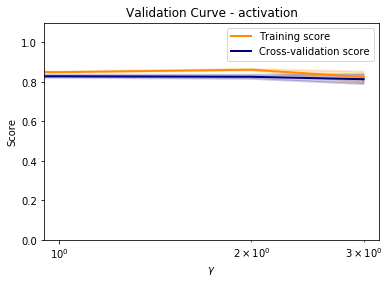

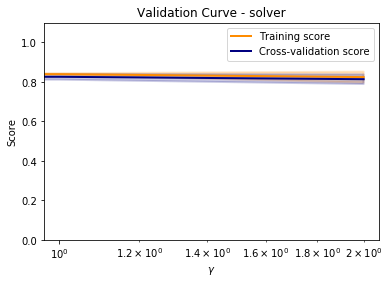

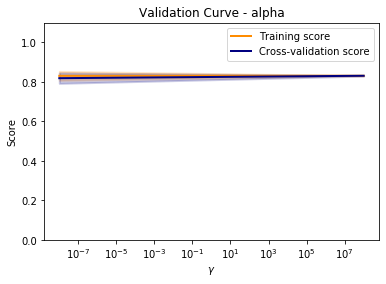

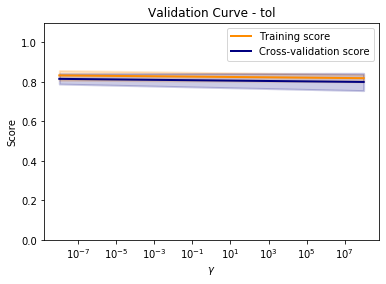

In [ ]:
mlp_hyperparams = {
    "activation": ["identity", "logistic", "tanh", "relu"],
    "solver": ["lbfgs", "sgd", "adam"],
    "alpha": [x for x in np.linspace(1e-8, 1e8, 2, dtype=float)],
    "tol": [x for x in np.linspace(1e-8, 1e8, 2, dtype=float)],
}
train_test_dataset = X_train.append(X_test)
train_test_dataset['depressed'] = y_train.append(y_test)
metrics = train_test_dataset.columns.values[:-1]
hpe = HyperParameterEvaluator(
    dataframe = train_test_dataset,
    regressor = MLPClassifier(random_state=0), 
    predictable_column = "depressed", 
    hyperparameters = mlp_hyperparams
)

hpe.evaluate_validation_curve(metrics) 

## iv) interpretação do modelo treinado, 
buscando obter insights sobre o impacto dos atributos na tomada de decisão

Foram feios testes em relação a remoção de colunas para testar a variação dos valores das métricas. Abaixo será mostrado o output de saídas da remoção de algumas colunas e o impacto nos resultados das métricas.

#### Remoção das colunas

#### Coluna children

A remoção da coluna diminui consideravelmente o valor da métrica de precisão:

MLP

Score:  0.61  Desv_padr:  0.05

Recall: 0.08376068376068377

Precision:  0.34229691876750695

Mean squared error:  0.18451612903225806
[[637   6]
 [130   2]]
random forest

Score:  0.56  Desv_padr:  0.04

Recall: 0.05327635327635327

Precision:  0.305

Mean squared error:  0.18451612903225806
[[626  17]
 [126   6]]

 Por exemplo, a remoção da coluna children reduziu a precisão pela metade.


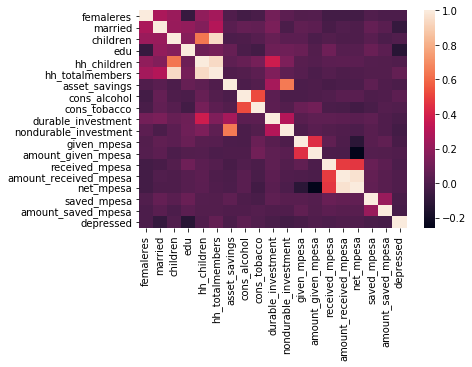

In [ ]:
ax = sns.heatmap(df_depressed_dataset.corr())